<a href="https://colab.research.google.com/github/toniyaduraj/ScriptSavr-Optimizing-Prescriptions.-Saving-Millions.-/blob/main/Prescription_Efficiency_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests

In [ ]:
# File path for NPIBN dataset
file_path_3 = '/content/drive/MyDrive/MUP_DPR_RY25_P04_V10_DY23_NPIBN.csv'
output_path_bn = '/content/drive/MyDrive/Boston_filtered_NPIBN.csv'  # ✅ new output path

chunksize = 100_000
first_chunk = True

for chunk in pd.read_csv(file_path_3, chunksize=chunksize, low_memory=False):
    chunk.columns = chunk.columns.str.strip()
    boston_chunk = chunk[chunk['Prscrbr_City'].str.strip().str.upper() == 'BOSTON']

    if not boston_chunk.empty:
        boston_chunk.to_csv(output_path_bn, mode='a', index=False, header=first_chunk)
        first_chunk = False

    print(f"[NPIBN] Processed chunk. Boston rows: {boston_chunk.shape[0]}")


[NPIBN] Processed chunk. Boston rows: 463
[NPIBN] Processed chunk. Boston rows: 317
[NPIBN] Processed chunk. Boston rows: 266
[NPIBN] Processed chunk. Boston rows: 370
[NPIBN] Processed chunk. Boston rows: 338
[NPIBN] Processed chunk. Boston rows: 327
[NPIBN] Processed chunk. Boston rows: 338
[NPIBN] Processed chunk. Boston rows: 335
[NPIBN] Processed chunk. Boston rows: 169
[NPIBN] Processed chunk. Boston rows: 587
[NPIBN] Processed chunk. Boston rows: 385
[NPIBN] Processed chunk. Boston rows: 308
[NPIBN] Processed chunk. Boston rows: 536
[NPIBN] Processed chunk. Boston rows: 211
[NPIBN] Processed chunk. Boston rows: 443
[NPIBN] Processed chunk. Boston rows: 371
[NPIBN] Processed chunk. Boston rows: 298
[NPIBN] Processed chunk. Boston rows: 343
[NPIBN] Processed chunk. Boston rows: 228
[NPIBN] Processed chunk. Boston rows: 228
[NPIBN] Processed chunk. Boston rows: 258
[NPIBN] Processed chunk. Boston rows: 299
[NPIBN] Processed chunk. Boston rows: 261
[NPIBN] Processed chunk. Boston ro

In [ ]:
# File path for NPIBN dataset

output_path_bn = '/content/drive/MyDrive/Boston_filtered_NPIBN.csv'  # ✅ new output path

In [ ]:
df2 = pd.read_csv(output_path_bn)

<ipython-input-3-fa74291c484c>:1: DtypeWarning: Columns (0,5,10,11,12,13,14,16,17,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(output_path_bn)


In [ ]:
df2.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
0,1003008244,Rajbhandari,Ruma,Boston,MA,25,Gastroenterology,Claim-Specialty,Gavilyte-G,"Peg3350/Sod Sulf,bicarb,cl/Kcl",...,55,821.07,52.0,#,NaN,NaN,NaN,NaN,#,NaN
1,1003008244,Rajbhandari,Ruma,Boston,MA,25,Gastroenterology,Claim-Specialty,Omeprazole,Omeprazole,...,2805,1301.13,18.0,NaN,35.0,93.5,1301.13,2805.0,NaN,18.0
2,1003008244,Rajbhandari,Ruma,Boston,MA,25,Gastroenterology,Claim-Specialty,Ursodiol,Ursodiol,...,1320,4415.79,NaN,#,NaN,NaN,NaN,NaN,*,NaN
3,1003011610,Ray,Alaka,Boston,MA,25,Internal Medicine,Claim-Specialty,Albuterol Sulfate Hfa,Albuterol Sulfate,...,609,731.44,NaN,#,NaN,NaN,NaN,NaN,*,NaN
4,1003011610,Ray,Alaka,Boston,MA,25,Internal Medicine,Claim-Specialty,Allopurinol,Allopurinol,...,1980,276.05,NaN,NaN,22.0,66.0,276.05,1980.0,*,NaN


In [ ]:

df2.shape

(100342, 22)

In [ ]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100342 entries, 0 to 100341
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Prscrbr_NPI            100342 non-null  object
 1   Prscrbr_Last_Org_Name  100342 non-null  object
 2   Prscrbr_First_Name     100342 non-null  object
 3   Prscrbr_City           100342 non-null  object
 4   Prscrbr_State_Abrvtn   100342 non-null  object
 5   Prscrbr_State_FIPS     100342 non-null  object
 6   Prscrbr_Type           100342 non-null  object
 7   Prscrbr_Type_Src       100342 non-null  object
 8   Brnd_Name              100342 non-null  object
 9   Gnrc_Name              100342 non-null  object
 10  Tot_Clms               100342 non-null  object
 11  Tot_30day_Fills        100342 non-null  object
 12  Tot_Day_Suply          100342 non-null  object
 13  Tot_Drug_Cst           100342 non-null  object
 14  Tot_Benes              35018 non-null   object
 15  

In [ ]:
df2.describe()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_City,Prscrbr_State_Abrvtn,Prscrbr_State_FIPS,Prscrbr_Type,Prscrbr_Type_Src,Brnd_Name,Gnrc_Name,...,Tot_Day_Suply,Tot_Drug_Cst,Tot_Benes,GE65_Sprsn_Flag,GE65_Tot_Clms,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Tot_Day_Suply,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes
count,100342,100342,100342,100342,100342,100342,100342,100342,100342,100342,...,100342,100342.00,35018.0,44537,55806.0,55806.0,55806.0,55806.0,90677,9666.0
unique,8310,6023,3006,2,4,5,83,4,1494,1082,...,11388,82398.00,402.0,3,725.0,4217.0,45304.0,8082.0,3,260.0
top,1780871970,Lee,Michael,Boston,MA,25,Internal Medicine,Claim-Specialty,Atorvastatin Calcium,Atorvastatin Calcium,...,360,282.44,11.0,#,0.0,0.0,0.0,0.0,*,11.0
freq,250,1036,1555,100341,100332,98295,30408,87755,2190,2192,...,1679,7.00,3537.0,29700,5190.0,5190.0,5191.0,5190.0,66661,1168.0


In [ ]:
df2.columns

Index(['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_City', 'Prscrbr_State_Abrvtn', 'Prscrbr_State_FIPS',
       'Prscrbr_Type', 'Prscrbr_Type_Src', 'Brnd_Name', 'Gnrc_Name',
       'Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst',
       'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms', 'GE65_Tot_30day_Fills',
       'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply', 'GE65_Bene_Sprsn_Flag',
       'GE65_Tot_Benes'],
      dtype='object')

In [ ]:
df2.drop(columns=['Prscrbr_Last_Org_Name', 'Prscrbr_First_Name', 'Prscrbr_State_Abrvtn', 'Prscrbr_State_FIPS',
       'GE65_Sprsn_Flag', 'GE65_Tot_Clms', 'GE65_Tot_30day_Fills',
       'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply', 'GE65_Bene_Sprsn_Flag',
       'GE65_Tot_Benes', 'Tot_Benes', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Prscrbr_Type_Src'], inplace=True)

In [ ]:
df2.head()

,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst
0,1003008244,Boston,Gastroenterology,Gavilyte-G,"Peg3350/Sod Sulf,bicarb,cl/Kcl",53,821.07
1,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13
2,1003008244,Boston,Gastroenterology,Ursodiol,Ursodiol,15,4415.79
3,1003011610,Boston,Internal Medicine,Albuterol Sulfate Hfa,Albuterol Sulfate,15,731.44
4,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05


In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100342 entries, 0 to 100341
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Prscrbr_NPI   100342 non-null  object
 1   Prscrbr_City  100342 non-null  object
 2   Prscrbr_Type  100342 non-null  object
 3   Brnd_Name     100342 non-null  object
 4   Gnrc_Name     100342 non-null  object
 5   Tot_Clms      100342 non-null  object
 6   Tot_Drug_Cst  100342 non-null  object
dtypes: object(7)
memory usage: 5.4+ MB


In [ ]:
df2.columns

Index(['Prscrbr_NPI', 'Prscrbr_City', 'Prscrbr_Type', 'Brnd_Name', 'Gnrc_Name',
       'Tot_Clms', 'Tot_Drug_Cst'],
      dtype='object')

In [ ]:
orange_raw = pd.read_csv('/content/drive/MyDrive/products.txt', delimiter='~', engine='python', on_bad_lines='skip')

# Check parsed columns
print(orange_raw.columns.tolist())


['Ingredient', 'DF;Route', 'Trade_Name', 'Applicant', 'Strength', 'Appl_Type', 'Appl_No', 'Product_No', 'TE_Code', 'Approval_Date', 'RLD', 'RS', 'Type', 'Applicant_Full_Name']


In [ ]:
orange_book = orange_raw[['Trade_Name', 'Ingredient', 'Appl_Type']].copy()
orange_book.columns = ['Brand_Name', 'Generic_Name', 'App_Type']
orange_book.head()


,Brand_Name,Generic_Name,App_Type
0,BUDESONIDE,BUDESONIDE,A
1,UCERIS,BUDESONIDE,N
2,AMZEEQ,MINOCYCLINE HYDROCHLORIDE,N
3,AZELAIC ACID,AZELAIC ACID,A
4,BETAMETHASONE VALERATE,BETAMETHASONE VALERATE,A


In [ ]:
orange_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46588 entries, 0 to 46587
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand_Name    46588 non-null  object
 1   Generic_Name  46588 non-null  object
 2   App_Type      46588 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [ ]:
orange_book.shape

(46588, 3)

In [ ]:

# Standardize names for better match
df2['Brnd_Name_clean'] = df2['Brnd_Name'].str.upper().str.strip()
orange_book['Brand_Name_clean'] = orange_book['Brand_Name'].str.upper().str.strip()

# Merge CMS with Orange Book using brand name
merged = pd.merge(
    df2,
    orange_book,
    left_on='Brnd_Name_clean',
    right_on='Brand_Name_clean',
    how='left'
)

# Flag if the CMS drug has a known generic equivalent
merged['Has_Generic_Equivalent'] = merged['Generic_Name'].notna()

# Flag if the CMS drug is a generic itself (from Orange Book)
merged['Prescribed_Is_Generic'] = merged['App_Type'] == 'A'

# Optional: drop helper columns if you want
merged.drop(['Brnd_Name_clean', 'Brand_Name_clean'], axis=1, inplace=True)

# Preview
merged[['Brnd_Name', 'Gnrc_Name', 'Generic_Name', 'App_Type', 'Has_Generic_Equivalent', 'Prescribed_Is_Generic']].head()


,Brnd_Name,Gnrc_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic
0,Gavilyte-G,"Peg3350/Sod Sulf,bicarb,cl/Kcl",NaN,NaN,False,False
1,Omeprazole,Omeprazole,OMEPRAZOLE,A,True,True
2,Omeprazole,Omeprazole,OMEPRAZOLE,A,True,True
3,Omeprazole,Omeprazole,OMEPRAZOLE,A,True,True
4,Omeprazole,Omeprazole,OMEPRAZOLE,A,True,True


In [ ]:
merged.head()


,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Brand_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic
0,1003008244,Boston,Gastroenterology,Gavilyte-G,"Peg3350/Sod Sulf,bicarb,cl/Kcl",53,821.07,NaN,NaN,NaN,False,False
1,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
2,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
3,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
4,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True


In [ ]:
# Remove exact duplicate rows (based on all columns)
merged_no_duplicates = merged.drop_duplicates()

# Optional: check shape before and after
print("Before:", merged.shape)
print("After:", merged_no_duplicates.shape)


Before: (4716711, 12)
After: (116893, 12)


In [ ]:
# Preview just the top rows
merged_no_duplicates.head(10)

,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Brand_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic
0,1003008244,Boston,Gastroenterology,Gavilyte-G,"Peg3350/Sod Sulf,bicarb,cl/Kcl",53,821.07,NaN,NaN,NaN,False,False
1,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
49,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,N,True,False
53,1003008244,Boston,Gastroenterology,Ursodiol,Ursodiol,15,4415.79,URSODIOL,URSODIOL,A,True,True
83,1003011610,Boston,Internal Medicine,Albuterol Sulfate Hfa,Albuterol Sulfate,15,731.44,NaN,NaN,NaN,False,False
84,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05,ALLOPURINOL,ALLOPURINOL,A,True,True
123,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05,ALLOPURINOL,ALLOPURINOL,N,True,False
131,1003011610,Boston,Internal Medicine,Amlodipine Besylate,Amlodipine Besylate,187,1582.93,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,N,True,False
134,1003011610,Boston,Internal Medicine,Amlodipine Besylate,Amlodipine Besylate,187,1582.93,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,A,True,True
247,1003011610,Boston,Internal Medicine,Atenolol,Atenolol,60,604.92,ATENOLOL,ATENOLOL,A,True,True


In [ ]:
df2 = ['Prscrbr_NPI',
       'Prscrbr_City', 'Brnd_Name',
       'Gnrc_Name', 'Tot_Clms',
       'Tot_Drug_Cst']
merged_deduped = merged.drop_duplicates(subset=df2)


In [ ]:
merged_deduped.head(50)

,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Brand_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic
0,1003008244,Boston,Gastroenterology,Gavilyte-G,"Peg3350/Sod Sulf,bicarb,cl/Kcl",53,821.07,NaN,NaN,NaN,False,False
1,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
53,1003008244,Boston,Gastroenterology,Ursodiol,Ursodiol,15,4415.79,URSODIOL,URSODIOL,A,True,True
83,1003011610,Boston,Internal Medicine,Albuterol Sulfate Hfa,Albuterol Sulfate,15,731.44,NaN,NaN,NaN,False,False
84,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05,ALLOPURINOL,ALLOPURINOL,A,True,True
131,1003011610,Boston,Internal Medicine,Amlodipine Besylate,Amlodipine Besylate,187,1582.93,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,N,True,False
247,1003011610,Boston,Internal Medicine,Atenolol,Atenolol,60,604.92,ATENOLOL,ATENOLOL,A,True,True
310,1003011610,Boston,Internal Medicine,Atorvastatin Calcium,Atorvastatin Calcium,241,4896.98,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,A,True,True
432,1003011610,Boston,Internal Medicine,Citalopram Hbr,Citalopram Hydrobromide,13,191.11,NaN,NaN,NaN,False,False
433,1003011610,Boston,Internal Medicine,Clonazepam,Clonazepam,16,77.08,CLONAZEPAM,CLONAZEPAM,A,True,True


In [ ]:

import numpy as np

# Define a function to apply your logic
def fill_app_type(row):
    if pd.isna(row['App_Type']):
        if pd.isna(row['Brnd_Name']) and pd.isna(row['Gnrc_Name']):
            return 'A'
        elif row['Brnd_Name'] == row['Gnrc_Name']:
            return 'A'
        else:
            return 'N'
    return row['App_Type']

# Apply the function to the DataFrame
merged_deduped['App_Type'] = merged_deduped.apply(fill_app_type, axis=1)


<ipython-input-23-55927d7d6e0e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_deduped['App_Type'] = merged_deduped.apply(fill_app_type, axis=1)


In [ ]:
merged_deduped.to_csv('/content/drive/MyDrive/CMS_Merged_Brand_vs_Generic_deduped.csv', index=False)

In [ ]:
merged_deduped.shape

(100342, 12)

In [ ]:
merged_deduped.columns

Index(['Prscrbr_NPI', 'Prscrbr_City', 'Prscrbr_Type', 'Brnd_Name', 'Gnrc_Name',
       'Tot_Clms', 'Tot_Drug_Cst', 'Brand_Name', 'Generic_Name', 'App_Type',
       'Has_Generic_Equivalent', 'Prescribed_Is_Generic'],
      dtype='object')

In [ ]:
brand_counts = merged_deduped['Brnd_Name'].value_counts()
print(brand_counts)

Brnd_Name
Atorvastatin Calcium    2190
Gabapentin              1998
Amlodipine Besylate     1786
Omeprazole              1665
Metoprolol Succinate    1640
                        ... 
Toremifene Citrate         1
Topiramate Er              1
Norditropin Flexpro        1
Sotyktu                    1
Thalomid                   1
Name: count, Length: 1494, dtype: int64


In [ ]:
merged_deduped.head(100)

,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Brand_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic
0,1003008244,Boston,Gastroenterology,Gavilyte-G,"Peg3350/Sod Sulf,bicarb,cl/Kcl",53,821.07,NaN,NaN,N,False,False
1,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
53,1003008244,Boston,Gastroenterology,Ursodiol,Ursodiol,15,4415.79,URSODIOL,URSODIOL,A,True,True
83,1003011610,Boston,Internal Medicine,Albuterol Sulfate Hfa,Albuterol Sulfate,15,731.44,NaN,NaN,N,False,False
84,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05,ALLOPURINOL,ALLOPURINOL,A,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4329,1003075276,Boston,Nephrology,Clonidine,Clonidine,12,2104.84,CLONIDINE,CLONIDINE,N,True,False
4342,1003075276,Boston,Nephrology,Famotidine,Famotidine,14,132.59,FAMOTIDINE,FAMOTIDINE,A,True,True
4449,1003075276,Boston,Nephrology,Farxiga,Dapagliflozin Propanediol,18,23645.58,FARXIGA,DAPAGLIFLOZIN,N,True,False
4451,1003075276,Boston,Nephrology,Furosemide,Furosemide,24,309.41,FUROSEMIDE,FUROSEMIDE,N,True,False


In [ ]:
merged_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100342 entries, 0 to 4716710
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Prscrbr_NPI             100342 non-null  object
 1   Prscrbr_City            100342 non-null  object
 2   Prscrbr_Type            100342 non-null  object
 3   Brnd_Name               100342 non-null  object
 4   Gnrc_Name               100342 non-null  object
 5   Tot_Clms                100342 non-null  object
 6   Tot_Drug_Cst            100342 non-null  object
 7   Brand_Name              67845 non-null   object
 8   Generic_Name            67845 non-null   object
 9   App_Type                100342 non-null  object
 10  Has_Generic_Equivalent  100342 non-null  bool  
 11  Prescribed_Is_Generic   100342 non-null  bool  
dtypes: bool(2), object(10)
memory usage: 8.6+ MB


In [ ]:
merged_deduped = merged_deduped.dropna(subset=['Brand_Name', 'Generic_Name'], how='all')


In [ ]:
merged_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67845 entries, 1 to 4716618
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Prscrbr_NPI             67845 non-null  object
 1   Prscrbr_City            67845 non-null  object
 2   Prscrbr_Type            67845 non-null  object
 3   Brnd_Name               67845 non-null  object
 4   Gnrc_Name               67845 non-null  object
 5   Tot_Clms                67845 non-null  object
 6   Tot_Drug_Cst            67845 non-null  object
 7   Brand_Name              67845 non-null  object
 8   Generic_Name            67845 non-null  object
 9   App_Type                67845 non-null  object
 10  Has_Generic_Equivalent  67845 non-null  bool  
 11  Prescribed_Is_Generic   67845 non-null  bool  
dtypes: bool(2), object(10)
memory usage: 5.8+ MB


In [ ]:
merged_deduped.head(10)

,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Brand_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic
1,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
53,1003008244,Boston,Gastroenterology,Ursodiol,Ursodiol,15,4415.79,URSODIOL,URSODIOL,A,True,True
84,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05,ALLOPURINOL,ALLOPURINOL,A,True,True
131,1003011610,Boston,Internal Medicine,Amlodipine Besylate,Amlodipine Besylate,187,1582.93,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,N,True,False
247,1003011610,Boston,Internal Medicine,Atenolol,Atenolol,60,604.92,ATENOLOL,ATENOLOL,A,True,True
310,1003011610,Boston,Internal Medicine,Atorvastatin Calcium,Atorvastatin Calcium,241,4896.98,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,A,True,True
433,1003011610,Boston,Internal Medicine,Clonazepam,Clonazepam,16,77.08,CLONAZEPAM,CLONAZEPAM,A,True,True
489,1003011610,Boston,Internal Medicine,Colchicine,Colchicine,11,173.46,COLCHICINE,COLCHICINE,A,True,True
506,1003011610,Boston,Internal Medicine,Eliquis,Apixaban,30,31989.0,ELIQUIS,APIXABAN,N,True,False
509,1003011610,Boston,Internal Medicine,Escitalopram Oxalate,Escitalopram Oxalate,31,482.51,ESCITALOPRAM OXALATE,ESCITALOPRAM OXALATE,A,True,True


In [ ]:
merged_deduped = merged_deduped[~((merged_deduped['Brnd_Name'] == merged_deduped['Gnrc_Name']) &
                                  (merged_deduped['App_Type'] == 'N'))]


In [ ]:
merged_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63229 entries, 1 to 4716618
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Prscrbr_NPI             63229 non-null  object
 1   Prscrbr_City            63229 non-null  object
 2   Prscrbr_Type            63229 non-null  object
 3   Brnd_Name               63229 non-null  object
 4   Gnrc_Name               63229 non-null  object
 5   Tot_Clms                63229 non-null  object
 6   Tot_Drug_Cst            63229 non-null  object
 7   Brand_Name              63229 non-null  object
 8   Generic_Name            63229 non-null  object
 9   App_Type                63229 non-null  object
 10  Has_Generic_Equivalent  63229 non-null  bool  
 11  Prescribed_Is_Generic   63229 non-null  bool  
dtypes: bool(2), object(10)
memory usage: 5.4+ MB


In [ ]:
merged_deduped.head(10)

,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Brand_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic
1,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True
53,1003008244,Boston,Gastroenterology,Ursodiol,Ursodiol,15,4415.79,URSODIOL,URSODIOL,A,True,True
84,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05,ALLOPURINOL,ALLOPURINOL,A,True,True
247,1003011610,Boston,Internal Medicine,Atenolol,Atenolol,60,604.92,ATENOLOL,ATENOLOL,A,True,True
310,1003011610,Boston,Internal Medicine,Atorvastatin Calcium,Atorvastatin Calcium,241,4896.98,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,A,True,True
433,1003011610,Boston,Internal Medicine,Clonazepam,Clonazepam,16,77.08,CLONAZEPAM,CLONAZEPAM,A,True,True
489,1003011610,Boston,Internal Medicine,Colchicine,Colchicine,11,173.46,COLCHICINE,COLCHICINE,A,True,True
506,1003011610,Boston,Internal Medicine,Eliquis,Apixaban,30,31989.0,ELIQUIS,APIXABAN,N,True,False
509,1003011610,Boston,Internal Medicine,Escitalopram Oxalate,Escitalopram Oxalate,31,482.51,ESCITALOPRAM OXALATE,ESCITALOPRAM OXALATE,A,True,True
564,1003011610,Boston,Internal Medicine,Estradiol,Estradiol,13,1841.33,ESTRADIOL,ESTRADIOL,A,True,True


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Ensure 'Tot_Clms' is numeric, coercing errors to NaN
merged_deduped['Tot_Clms'] = pd.to_numeric(merged_deduped['Tot_Clms'], errors='coerce')

# Total and brand claims per provider
# .sum() on a numeric column will ignore NaN values, so no need to explicitly drop NaNs here
total_claims_per_npi = merged_deduped.groupby('Prscrbr_NPI')['Tot_Clms'].sum()
brand_claims_per_npi = merged_deduped[merged_deduped['Prescribed_Is_Generic'] == False].groupby('Prscrbr_NPI')['Tot_Clms'].sum()
brand_claims_per_npi = brand_claims_per_npi.reindex(total_claims_per_npi.index, fill_value=0)

# Compute brand prescription rate per provider
# Add a small epsilon or check for zero to avoid division by zero if total_claims_per_npi can be 0
# For simplicity, filling potential resulting Infs/NaNs with 0 if total_claims_per_npi was 0.
brand_rate = (brand_claims_per_npi / total_claims_per_npi.replace(0, pd.NA)).fillna(0).reset_index(name='Brand_Prescription_Rate')


# Merge into main DataFrame for per-provider analysis
provider_summary = pd.DataFrame({
    'Prscrbr_NPI': total_claims_per_npi.index,
    'Total_Claims': total_claims_per_npi.values,
    'Brand_Claims': brand_claims_per_npi.values,
})
provider_summary = provider_summary.merge(brand_rate, on='Prscrbr_NPI')

 # Merge into main dataset
merged_deduped = merged_deduped.merge(brand_rate, on='Prscrbr_NPI', how='left')

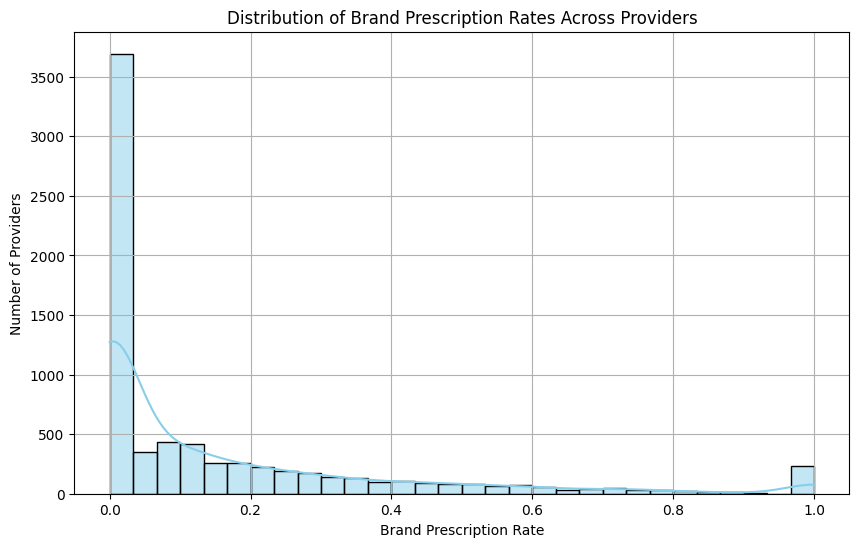

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(provider_summary['Brand_Prescription_Rate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Brand Prescription Rates Across Providers')
plt.xlabel('Brand Prescription Rate')
plt.ylabel('Number of Providers')
plt.grid(True)
plt.show()


In [ ]:
# Ensure 'Tot_Clms' is numeric, coercing errors to NaN
merged_deduped['Tot_Clms'] = pd.to_numeric(merged_deduped['Tot_Clms'], errors='coerce')

# Add this line to ensure 'Tot_Drug_Cst' is numeric
merged_deduped['Tot_Drug_Cst'] = pd.to_numeric(merged_deduped['Tot_Drug_Cst'], errors='coerce')


# Total and brand claims per provider
# .sum() on a numeric column will ignore NaN values, so no need to explicitly drop NaNs here
total_claims_per_npi = merged_deduped.groupby('Prscrbr_NPI')['Tot_Clms'].sum()
brand_claims_per_npi = merged_deduped[merged_deduped['Prescribed_Is_Generic'] == False].groupby('Prscrbr_NPI')['Tot_Clms'].sum()
brand_claims_per_npi = brand_claims_per_npi.reindex(total_claims_per_npi.index, fill_value=0)

# Compute brand prescription rate per provider
# Add a small epsilon or check for zero to avoid division by zero if total_claims_per_npi can be 0
# For simplicity, filling potential resulting Infs/NaNs with 0 if total_claims_per_npi was 0.
brand_rate = (brand_claims_per_npi / total_claims_per_npi.replace(0, pd.NA)).fillna(0).reset_index(name='Brand_Prescription_Rate')


# Merge into main DataFrame for per-provider analysis
provider_summary = pd.DataFrame({
    'Prscrbr_NPI': total_claims_per_npi.index,
    'Total_Claims': total_claims_per_npi.values,
    'Brand_Claims': brand_claims_per_npi.values,
})
provider_summary = provider_summary.merge(brand_rate, on='Prscrbr_NPI')

 # Merge into main dataset
merged_deduped = merged_deduped.merge(brand_rate, on='Prscrbr_NPI', how='left')

# Filter brand-name prescriptions AFTER ensuring numeric types
df_brand = merged_deduped[merged_deduped['Prescribed_Is_Generic'] == False]

# Average cost per brand-name drug (by brand name)
avg_brand_cost = df_brand.groupby('Brnd_Name')['Tot_Drug_Cst'].mean()

# Filter generic prescriptions AFTER ensuring numeric types
df_generic = merged_deduped[merged_deduped['Prescribed_Is_Generic'] == True]

# Average cost per generic drug (by generic name)
avg_generic_cost = df_generic.groupby('Gnrc_Name')['Tot_Drug_Cst'].mean()

# Function to calculate cost waste
def compute_cost_waste(row):
    # Ensure brand_cost and generic_cost are numeric before subtraction
    brand_cost = avg_brand_cost.get(row['Brnd_Name'], 0)
    generic_cost = avg_generic_cost.get(row['Gnrc_Name'], 0)
    # Ensure the result of the difference is non-negative
    cost_difference = max((brand_cost - generic_cost), 0)

    # Avoid division by zero if Tot_Clms is 0
    if row['Tot_Clms'] > 0:
        return cost_difference / row['Tot_Clms']
    else:
        return 0


# Apply cost waste calculation to merged_deduped
merged_deduped['Cost_Waste'] = merged_deduped.apply(compute_cost_waste, axis=1)

In [ ]:
merged_deduped.head(42)

,Prscrbr_NPI,Prscrbr_City,Prscrbr_Type,Brnd_Name,Gnrc_Name,Tot_Clms,Tot_Drug_Cst,Brand_Name,Generic_Name,App_Type,Has_Generic_Equivalent,Prescribed_Is_Generic,Brand_Prescription_Rate_x,Brand_Prescription_Rate_y,Cost_Waste
0,1003008244,Boston,Gastroenterology,Omeprazole,Omeprazole,35,1301.13,OMEPRAZOLE,OMEPRAZOLE,A,True,True,0.000000,0.000000,0.000000
1,1003008244,Boston,Gastroenterology,Ursodiol,Ursodiol,15,4415.79,URSODIOL,URSODIOL,A,True,True,0.000000,0.000000,0.000000
2,1003011610,Boston,Internal Medicine,Allopurinol,Allopurinol,22,276.05,ALLOPURINOL,ALLOPURINOL,A,True,True,0.103213,0.103213,0.000000
3,1003011610,Boston,Internal Medicine,Atenolol,Atenolol,60,604.92,ATENOLOL,ATENOLOL,A,True,True,0.103213,0.103213,0.000000
4,1003011610,Boston,Internal Medicine,Atorvastatin Calcium,Atorvastatin Calcium,241,4896.98,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,A,True,True,0.103213,0.103213,0.000000
5,1003011610,Boston,Internal Medicine,Clonazepam,Clonazepam,16,77.08,CLONAZEPAM,CLONAZEPAM,A,True,True,0.103213,0.103213,0.000000
6,1003011610,Boston,Internal Medicine,Colchicine,Colchicine,11,173.46,COLCHICINE,COLCHICINE,A,True,True,0.103213,0.103213,0.000000
7,1003011610,Boston,Internal Medicine,Eliquis,Apixaban,30,31989.00,ELIQUIS,APIXABAN,N,True,False,0.103213,0.103213,1835.402964
8,1003011610,Boston,Internal Medicine,Escitalopram Oxalate,Escitalopram Oxalate,31,482.51,ESCITALOPRAM OXALATE,ESCITALOPRAM OXALATE,A,True,True,0.103213,0.103213,0.000000
9,1003011610,Boston,Internal Medicine,Estradiol,Estradiol,13,1841.33,ESTRADIOL,ESTRADIOL,A,True,True,0.103213,0.103213,0.000000


In [ ]:
# Define threshold at 90th percentile
threshold = provider_summary['Brand_Prescription_Rate'].quantile(0.9)

# Flag high prescribers
provider_summary['Is_Outlier'] = provider_summary['Brand_Prescription_Rate'] > threshold

# List of outlier providers
outliers = provider_summary[provider_summary['Is_Outlier']]
print(f"Number of outlier providers: {len(outliers)}")
print(outliers[['Prscrbr_NPI', 'Brand_Prescription_Rate']].head(727))


Number of outlier providers: 728
     Prscrbr_NPI  Brand_Prescription_Rate
16    1003173568                 0.509281
38    1003348913                 0.570513
55    1003566191                 0.607843
59    1003806571                 0.711517
95    1013238252                 1.000000
...          ...                      ...
7367  1992712178                 1.000000
7369  1992729453                 1.000000
7376  1992760847                 1.000000
7383  1992795512                 0.716292
7389  1992870638                 0.543689

[727 rows x 2 columns]


In [ ]:
# Sum cost waste per provider
cost_waste_per_provider = merged_deduped.groupby('Prscrbr_NPI')['Cost_Waste'].sum().reset_index(name='Total_Cost_Waste')

# Merge with provider summary
provider_summary = provider_summary.merge(cost_waste_per_provider, on='Prscrbr_NPI', how='left')


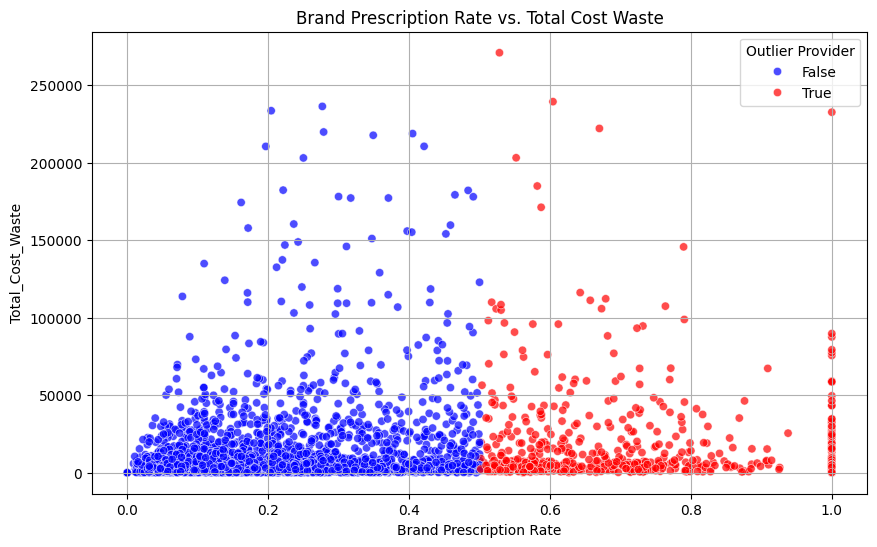

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=provider_summary,
    x='Brand_Prescription_Rate',
    y='Total_Cost_Waste',
    hue='Is_Outlier',
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Brand Prescription Rate vs. Total Cost Waste')
plt.xlabel('Brand Prescription Rate')
plt.ylabel('Total_Cost_Waste')
plt.grid(True)
plt.legend(title='Outlier Provider')
plt.show()


In [ ]:
# Top potentially inefficient providers
inefficient_providers = provider_summary.sort_values(by='Total_Cost_Waste', ascending=False).head(10)
# Convert to formatted string in dollar format
inefficient_providers['Formatted_Cost_Waste'] = inefficient_providers['Total_Cost_Waste'].apply(lambda x: f"${x:,.2f}")
print(inefficient_providers[['Prscrbr_NPI', 'Brand_Prescription_Rate', 'Total_Cost_Waste', 'Formatted_Cost_Waste']])


     Prscrbr_NPI  Brand_Prescription_Rate  Total_Cost_Waste  \
5502  1750365664                 0.528226     271061.921272   
460   1063460087                 0.604196     239476.917990   
3963  1548421779                 0.276868     236426.563504   
4187  1578540456                 0.204270     233629.702900   
3324  1457660243                 1.000000     232682.330541   
3819  1528036894                 0.670103     222199.333994   
6942  1942614011                 0.278714     219905.023657   
875   1124403209                 0.405000     218869.620835   
2908  1407237597                 0.349112     217795.607886   
5977  1811403611                 0.421311     210650.557409   

     Formatted_Cost_Waste  
5502          $271,061.92  
460           $239,476.92  
3963          $236,426.56  
4187          $233,629.70  
3324          $232,682.33  
3819          $222,199.33  
6942          $219,905.02  
875           $218,869.62  
2908          $217,795.61  
5977          $210,650.56 

<ipython-input-44-f37354086031>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


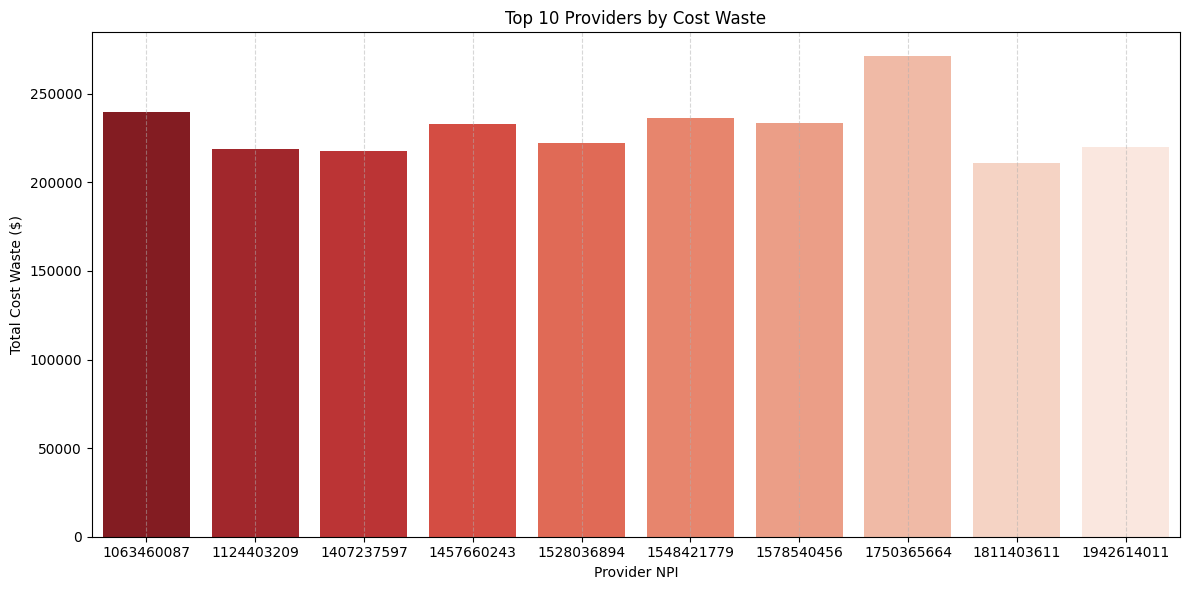

In [ ]:

# Filter out providers with 0 cost waste
inefficient_providers = provider_summary[provider_summary['Total_Cost_Waste'] > 0]

# Select top 10 by cost waste
top_inefficient = inefficient_providers.sort_values(by='Total_Cost_Waste', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_inefficient,
    y='Total_Cost_Waste',
    x='Prscrbr_NPI',
    palette='Reds_r'
)

plt.title('Top 10 Providers by Cost Waste')
plt.xlabel('Provider NPI')
plt.ylabel('Total Cost Waste ($)')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


<ipython-input-45-c92f30442f93>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


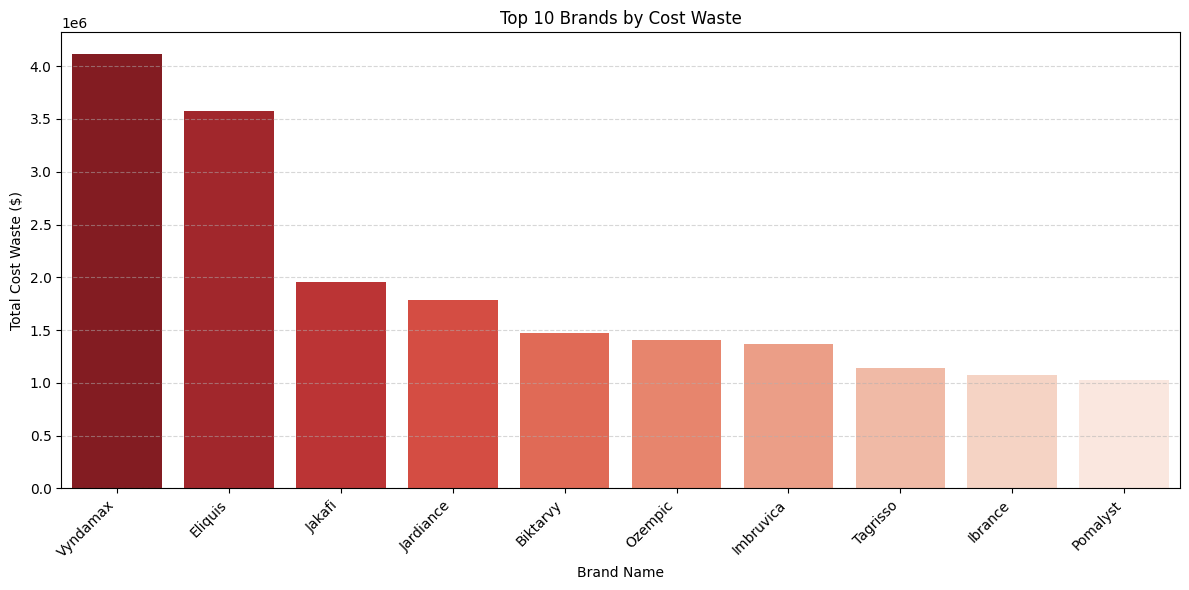

In [ ]:


# Filter out rows where cost waste is zero or missing
df_filtered = merged_deduped[merged_deduped['Cost_Waste'] > 0]

# Group by brand name and sum the cost waste
brand_cost_waste = df_filtered.groupby('Brnd_Name')['Cost_Waste'].sum().reset_index()

# Sort by total cost waste in descending order
top_brands_by_waste = brand_cost_waste.sort_values(by='Cost_Waste', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_brands_by_waste,
    y='Cost_Waste',
    x='Brnd_Name',
    palette='Reds_r'
)

plt.title('Top 10 Brands by Cost Waste')
plt.xlabel('Brand Name')
plt.ylabel('Total Cost Waste ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
# Create a dictionary of brand to generic mappings
brand_to_generic = (
    merged_deduped[merged_deduped['Has_Generic_Equivalent']]
    .dropna(subset=['Brnd_Name', 'Gnrc_Name'])
    .drop_duplicates(subset=['Brnd_Name'])  # in case brand maps to a single generic
    .set_index('Brnd_Name')['Gnrc_Name']
    .to_dict()
)

# Function to suggest generic name
def suggest_generic(brand_name):
    return brand_to_generic.get(brand_name, "No generic equivalent found")

# Example usage
suggest_generic("Eliquis")  # Output: 'Apixaban' (if mapping exists)


'Apixaban'

In [ ]:
suggest_generic("Jardiance")

'Empagliflozin'

In [ ]:
# Preprocess: lowercase and clean dictionary
brand_to_generic = (
    merged_deduped[merged_deduped['Has_Generic_Equivalent']]
    .dropna(subset=['Brnd_Name', 'Gnrc_Name'])
    .drop_duplicates(subset=['Brnd_Name'])  # assume 1:1 mapping
)

# Create lookup dictionary with lowercase keys
brand_to_generic_dict = {
    brand.lower(): generic for brand, generic in zip(
        brand_to_generic['Brnd_Name'], brand_to_generic['Gnrc_Name']
    )
}

# Suggest function with prefix search and case-insensitive match
def suggest_generic(brand_input, max_suggestions=5):
    brand_input = brand_input.strip().lower()

    # Find matching brand names that start with input
    matches = [brand for brand in brand_to_generic_dict if brand.startswith(brand_input)]

    if not matches:
        return "No generic equivalent found for input."

    # Return matched generic names
    suggestions = {
        brand: brand_to_generic_dict[brand] for brand in matches[:max_suggestions]
    }

    return suggestions


In [ ]:
suggest_generic("eli")

{'eliquis': 'Apixaban'}

In [ ]:
# Interactive in Jupyter
brand_input = input("Enter brand name: ").strip().lower()

matches = {
    brand: generic for brand, generic in brand_to_generic_dict.items()
    if brand.startswith(brand_input)
}

if matches:
    for brand, generic in matches.items():
        print(f"{brand.title()} → {generic.title()}")
else:
    print("No generic equivalent found.")


Enter brand name: eli
Eliquis → Apixaban


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

df = merged_deduped.copy()

# Filter rows with valid mappings
df = df.dropna(subset=['Brnd_Name', 'Gnrc_Name', 'Has_Generic_Equivalent'])
df = df[df['Has_Generic_Equivalent'] == True]

# Optional: lowercase names for consistency
df['Brnd_Name'] = df['Brnd_Name'].str.lower()
df['Gnrc_Name'] = df['Gnrc_Name'].str.lower()


In [ ]:
# Encode categorical features
df['App_Type'] = df['App_Type'].map({'A': 0, 'N': 1})
df['Prescribed_Is_Generic'] = df['Prescribed_Is_Generic'].astype(int)

# Encode drug names
le_brand = LabelEncoder()
le_generic = LabelEncoder()

df['Brand_Code'] = le_brand.fit_transform(df['Brnd_Name'])
df['Generic_Code'] = le_generic.fit_transform(df['Gnrc_Name'])


In [ ]:
merged_deduped = merged_deduped.drop(columns=['Prscrbr_Type'])


In [ ]:
# Make a copy
df = merged_deduped.copy()

# Encode target: Generic name
le_generic = LabelEncoder()
df['Generic_Code'] = le_generic.fit_transform(df['Gnrc_Name'].astype(str))

# Encode brand name
le_brand = LabelEncoder()
df['Brand_Code'] = le_brand.fit_transform(df['Brnd_Name'].astype(str))

# Encode App_Type
df['App_Type'] = df['App_Type'].astype(str)
le_app = LabelEncoder()
df['App_Type_Encoded'] = le_app.fit_transform(df['App_Type'])

# Fill missing numeric values
df['Tot_Drug_Cst'] = df['Tot_Drug_Cst'].fillna(0)
df['Tot_Clms'] = df['Tot_Clms'].fillna(0)
df['Prescribed_Is_Generic'] = df['Prescribed_Is_Generic'].astype(int)

# Define feature columns (excluding 'Prscrbr_Type')
feature_cols = [
    'Brand_Code',
    'App_Type_Encoded',
    'Prescribed_Is_Generic',
    'Tot_Clms',
    'Tot_Drug_Cst'
]

# Prepare features and target
X = df[feature_cols]
y = df['Generic_Code']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.78      1.00      0.88         7
           2       0.88      0.88      0.88         8
           3       1.00      1.00      1.00         6
           4       1.00      0.89      0.94        18
           6       0.57      1.00      0.73         4
           8       0.00      0.00      0.00         2
           9       0.67      1.00      0.80         8
          10       0.00      0.00      0.00         2
          11       0.83      1.00      0.91         5
          12       0.96      1.00      0.98        49
          13       0.99      0.98      0.98        85
          14       0.00      0.00      0.00         1
          16       0.99      1.00      0.99        96
          17       1.00      1.00      1.00       110
          19       1.00      1.00      1.00        60
          20       1.00      0.50      0.67         2
          21       0.75    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF on Brand Names
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=500)
X_text = tfidf.fit_transform(df['Brnd_Name'].fillna(''))


In [ ]:
# Minimum examples required for a generic to be kept
min_samples = 5
generic_counts = df['Gnrc_Name'].value_counts()

# Filter data to only frequent generic names
frequent_generics = generic_counts[generic_counts >= min_samples].index
df_filtered = df[df['Gnrc_Name'].isin(frequent_generics)].copy()


In [ ]:
# Dictionary map
brand_to_generic_dict = merged_deduped[
    merged_deduped["Has_Generic_Equivalent"]
].dropna(subset=["Brnd_Name", "Gnrc_Name"]) \
 .drop_duplicates(subset=["Brnd_Name"]) \
 .set_index("Brnd_Name")["Gnrc_Name"].str.title().to_dict()

# Case insensitive match from user input
while True:
    user_input = input("Enter a brand name (or 'exit' to stop): ").strip().lower()
    if user_input == 'exit':
        break

    matches = {
        brand: generic
        for brand, generic in brand_to_generic_dict.items()
        if brand.lower().startswith(user_input)
    }

    if matches:
        print("\nTop matches:")
        for brand, generic in list(matches.items())[:3]:  # Limit to 3
            print(f"{brand.title()} → {generic}")
        print("-" * 40)
    else:
        print("No generic equivalent found.\n" + "-" * 40)


Enter a brand name (or 'exit' to stop): eli

Top matches:
Eliquis → Apixaban
----------------------------------------
Enter a brand name (or 'exit' to stop): exit


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Define target: Assume high-value prescriptions are labeled
df['is_high_value'] = (merged_deduped['Tot_Drug_Cst'] < merged_deduped['Tot_Drug_Cst'].median()).astype(int)

# Select features
features = ['Gnrc_Name', 'Tot_Clms']
target = 'is_high_value'

X = df[features]
y = df[target]

# Preprocessing for categorical features
categorical = ['Gnrc_Name']
numeric = ['Tot_Clms']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6364
           1       0.87      0.91      0.89      6282

    accuracy                           0.89     12646
   macro avg       0.89      0.89      0.89     12646
weighted avg       0.89      0.89      0.89     12646



In [ ]:
# Add is_brand based on whether it's a generic drug or not
# Ensure 'Gnrc_Name' is string type before applying upper()
df['is_brand'] = df['Gnrc_Name'].astype(str).apply(lambda x: 0 if 'GENERIC' in x.upper() else 1)

# --- BNPR (Brand-Name Prescription Rate) ---
bnpr = df.groupby('Prscrbr_NPI').agg(
    brand_prescriptions=('is_brand', 'sum'),
    total_prescriptions=('is_brand', 'count')
)
# Avoid division by zero by filling total_prescriptions = 0 with NaN, then filling result with 0
bnpr['BNPR'] = (bnpr['brand_prescriptions'] / bnpr['total_prescriptions'].replace(0, pd.NA)).fillna(0)


# --- CIS (Cost Inefficiency Score) ---
# Use median drug cost per drug name as benchmark
# Ensure 'Tot_Drug_Cst' is numeric, coercing errors to NaN
df['Tot_Drug_Cst'] = pd.to_numeric(df['Tot_Drug_Cst'], errors='coerce')
benchmarks = df.groupby('Gnrc_Name')['Tot_Drug_Cst'].median().rename('benchmark_cost')

# Merge with 'benchmark_cost' using a left merge to keep all rows from df
# Fill NaN values in 'benchmark_cost' that resulted from the merge (no match found)
df = df.merge(benchmarks, on='Gnrc_Name', how='left')
df['benchmark_cost'] = df['benchmark_cost'].fillna(0) # Fill missing benchmarks with 0

# Calculate excess_cost. Ensure 'Tot_Drug_Cst' is numeric (done above)
# Ensure excess cost is not negative
df['excess_cost'] = (df['Tot_Drug_Cst'] - df['benchmark_cost']).clip(lower=0)


cis = df.groupby('Prscrbr_NPI').agg(
    total_excess_cost=('excess_cost', 'sum'),
    total_cost=('Tot_Drug_Cst', 'sum')
)
# Avoid division by zero by filling total_cost = 0 with NaN, then filling result with 0
cis['CIS'] = (cis['total_excess_cost'] / cis['total_cost'].replace(0, pd.NA)).fillna(0)

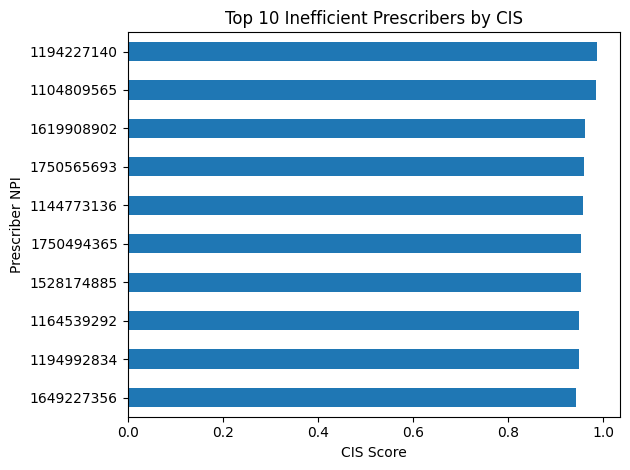

In [ ]:
# Combine BNPR and CIS
inefficiency_df = bnpr.merge(cis, left_index=True, right_index=True)

# Sort by CIS descending and save
inefficiency_df = inefficiency_df.sort_values(by='CIS', ascending=False)
inefficiency_df.to_csv('/content/drive/MyDrive/inefficient_prescribers.csv')

# Optional: Also visualize top 10
import matplotlib.pyplot as plt

top10 = inefficiency_df.head(10)
top10['CIS'].plot(kind='barh', title='Top 10 Inefficient Prescribers by CIS')
plt.xlabel('CIS Score')
plt.ylabel('Prescriber NPI')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Flag inefficient prescribers
alerts = inefficiency_df[(inefficiency_df['BNPR'] > 0.6) & (inefficiency_df['CIS'] > 0.2)].copy()
alerts['alert_message'] = 'Consider switching to cost-effective alternatives for top prescribed drugs.'

# Show sample alerts
alerts[['alert_message']].head(10)


,alert_message
Prscrbr_NPI,
1194227140,Consider switching to cost-effective alternati...
1104809565,Consider switching to cost-effective alternati...
1619908902,Consider switching to cost-effective alternati...
1750565693,Consider switching to cost-effective alternati...
1144773136,Consider switching to cost-effective alternati...
1750494365,Consider switching to cost-effective alternati...
1528174885,Consider switching to cost-effective alternati...
1164539292,Consider switching to cost-effective alternati...
1194992834,Consider switching to cost-effective alternati...
